In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Exercise 2
Verify the claim above numerically, by studying what value the quadratic variation
converges to as n → ∞. Provide an informal proof based on the central limit theorem.

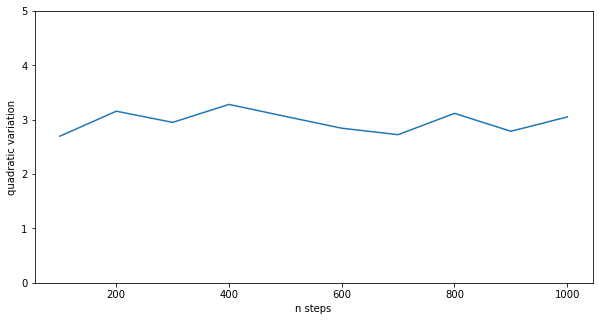

In [2]:
T = 3
max_steps = 1000
nplot = 10
ninc = int(max_steps/nplot)

nn = []
qvar = []
err = []

for i in range(0, nplot):
    n = (i+1)*ninc
    dt = T/n
    Z = np.random.randn(n)
    
    qvar1 = 0
    qvar2 = 0
    wi = 0
    wip1 = 0
    
    for j in range(0, n-1):
        wip1 = wi + Z[j]*np.sqrt(dt)
        rpip = wip1-wi
        qvar1 = qvar1 + rpip**2
        qvar2 = qvar2 + rpip**4
        wi = wip1
        
    nn.append(n)
    qvar.append(qvar1)
    err.append(np.sqrt(qvar2/n-qvar1/n**2)*np.sqrt(n))
    
figure, axis = plt.subplots(figsize=(10,5))
axis.plot(nn, qvar)
axis.set_xlabel('n steps')
axis.set_ylabel('quadratic variation')
plt.ylim(0, 5)
plt.show()

# Exercise 4
Consider a European call option with maturity T > 0 and strike K > 0 evaluated
at time zero, written on a stock price process (St)t≥0 following the Black-Scholes model. Consider the
following values: S0 = 100, r = 0.0 and σ = 25%. Plot the convergence of the tree when K = 90, K = 100
and K = 110. Plot also the convergence of the tree for even and odd increasing number of time steps.
Comment the obtained results. Extrapolate for n → ∞ and compare with Black Scholes results. Do the same
for Delta and Gamma. Do the same for a put option.

### Binomial tree calculation
In the following cell, we write the function to calculate the option payoff with the binomial tree method.

In [3]:
def binomial(S0, K, sigma, r, T, N, option_type):
    
    V = np.zeros(N + 1) # dummy list to store payoff values 
    dt = T/N # step size
    u = np.exp(sigma * np.sqrt(dt)) # upwards factor
    d = 1/u # downwards factor

    St = np.array([(S0 * u**num * d ** (N - num)) for num in range(N + 1)]) # current price

    comp = np.exp(r*dt) # rate compounded
    p = (comp-d)/(u-d) # upwards probability
    q = 1-p # downwards probability

    if option_type == "call":
        V[:] = np.maximum(St-K, 0) # define payoff for a call
    if option_type == "put":
        V[:] = np.maximum(K-St, 0) # define payoff for a put

    for i in range(N-1, -1, -1):
        V[:-1] = np.exp(-r*dt) * (p*V[1:] + q*V[:-1]) # overwrite payoff at each step and work backwards
        
    # calculate option delta and gamma
    delta = ((V[1]-V[0])) / (S0*(u-d))
    gamma = ((V[2] - V[1]) / (S0 * u ** 2 - S0 * u * d) - 
             (V[1] - V[0]) / (S0 * u * d - S0 * d ** 2)) / (S0*0.5*(u ** 2 - d ** 2))
        
    # return results
    return V[0], delta, gamma

Now that we have our binomial function, we will create empty lists to store the returned payoff values. We'll eventually use the list of values to plot the convergence graph.

In [4]:
n_points = np.arange(start=10000, stop=100000, step=10000)
y_points_call_90 = []
y_points_call_100 = []
y_points_call_110 = []
y_points_put_90 = []
y_points_put_100 = []
y_points_put_110 = []

The next cell creates empty lists to store delta and gamma values.

In [5]:
call_90_delta = []
call_100_delta = []
call_110_delta = []
put_90_delta = []
put_100_delta = []
put_110_delta = []
gamma_90 = []
gamma_100 = []
gamma_110 = []

In the next cell, we'll increase the number of steps and run the binomial function. Each time, the list is appended with the payoff, delta, and gamma values.

In [6]:
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value, delta, gamma = binomial(100, 90, 0.25, 0, 1, N, "call")
    y_points_call_90.append(payoff_value)
    call_90_delta.append(delta)
    gamma_90.append(gamma)
for N in np.arange(start=10000, stop=100000, step=10000): 
    payoff_value, delta, gamma = binomial(100, 100, 0.25, 0, 1, N, "call")
    y_points_call_100.append(payoff_value)
    call_100_delta.append(delta)
    gamma_100.append(gamma)
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value, delta, gamma = binomial(100, 110, 0.25, 0, 1, N, "call")
    y_points_call_110.append(payoff_value)
    call_110_delta.append(delta)
    gamma_110.append(gamma)
for N in np.arange(start=10000, stop=100000, step=10000): 
    payoff_value, delta, gamma = binomial(100, 90, 0.25, 0, 1, N, "put")
    y_points_put_90.append(payoff_value)
    put_90_delta.append(delta)
for N in np.arange(start=10000, stop=100000, step=10000): 
    payoff_value, delta, gamma = binomial(100, 100, 0.25, 0, 1, N, "put")
    y_points_put_100.append(payoff_value)
    put_100_delta.append(delta)
for N in np.arange(start=10000, stop=100000, step=10000): 
    payoff_value, delta, gamma = binomial(100, 110, 0.25, 0, 1, N, "put")
    y_points_put_110.append(payoff_value)
    put_110_delta.append(delta)

### Plot the payoff values for the call option at different strikes as N → ∞

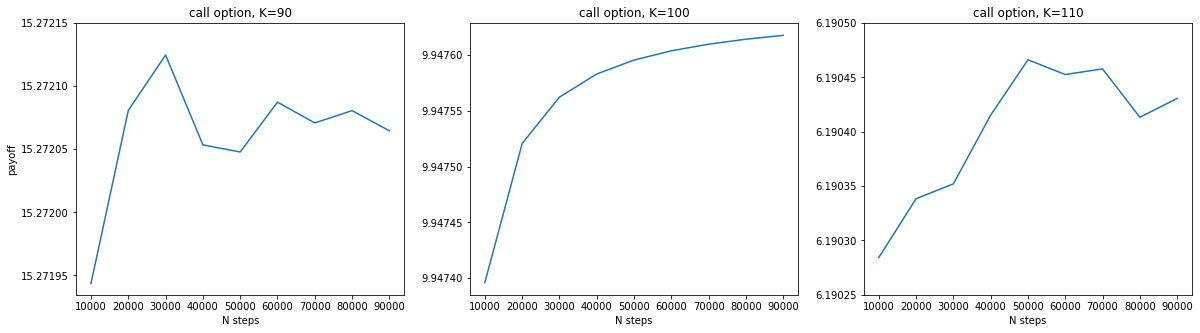

In [7]:
X = n_points
  
Y1 = y_points_call_90 
Y2 = y_points_call_100
Y3 = y_points_call_110
  
figure, axis = plt.subplots(1, 3, figsize=(20,5)) 

axis[0].plot(X, Y1) 
axis[0].set_title("call option, K=90") 
axis[0].ticklabel_format(useOffset=False)
axis[0].yaxis.set_ticks(np.arange(15.27195, 15.2722, 0.00005))
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
  
axis[1].plot(X, Y2) 
axis[1].set_title("call option, K=100")
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")

axis[2].plot(X, Y3) 
axis[2].set_title("call option, K=110")
axis[2].ticklabel_format(useOffset=False)
axis[2].yaxis.set_ticks(np.arange(6.19025, 6.19054, 0.00005))
axis[2].set_xlabel("N steps")

plt.show() 

In [8]:
print("Call option, K = 90:", y_points_call_90[-1])
print("Call option, K = 100:", y_points_call_100[-1])
print("Call option, K = 110:", y_points_call_110[-1])

Call option, K = 90: 15.272064586276748
Call option, K = 100: 9.947617334164036
Call option, K = 110: 6.190430635557193


The payoff for the call option when N is large is approximately equal to the payoff calculated by the Black Scholes model, which is shown later.

### Plot the payoff values for the put option at different strikes as N → ∞

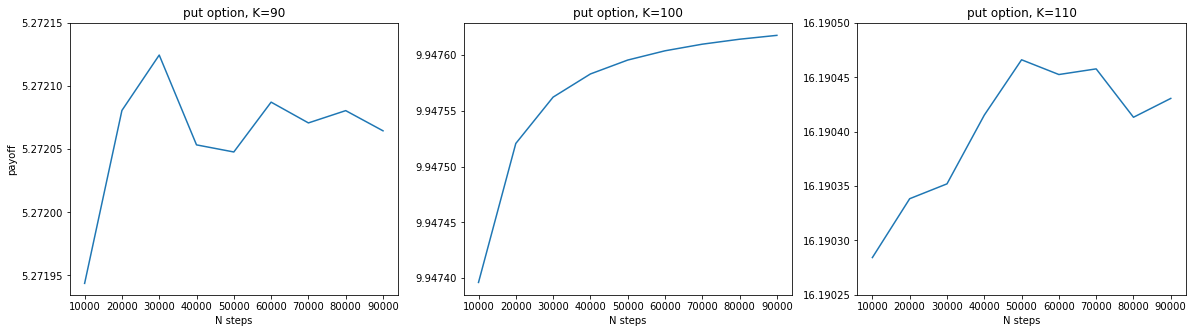

In [9]:
X = n_points
  
Y1 = y_points_put_90 
Y2 = y_points_put_100
Y3 = y_points_put_110
  
figure, axis = plt.subplots(1, 3, figsize=(20,5)) 

axis[0].plot(X, Y1)
axis[0].set_title("put option, K=90")
axis[0].ticklabel_format(useOffset=False)
axis[0].yaxis.set_ticks(np.arange(5.27195, 5.2722, 0.00005))
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
  
axis[1].plot(X, Y2) 
axis[1].set_title("put option, K=100")
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")

  
axis[2].plot(X, Y3) 
axis[2].set_title("put option, K=110")
axis[2].ticklabel_format(useOffset=False)
axis[2].yaxis.set_ticks(np.arange(16.19025, 16.19054, 0.00005))
axis[2].set_xlabel("N steps")

plt.show() 

In [10]:
print("Put option, K = 90:", y_points_put_90[-1])
print("Put option, K = 100:", y_points_put_100[-1])
print("Put option, K = 110:", y_points_put_110[-1])

Put option, K = 90: 5.2720645862773825
Put option, K = 100: 9.947617334164802
Put option, K = 110: 16.19043063555901


The payoff for the put option when N is large is approximately equal to the payoff calculated by the Black Scholes model, which is shown later.

### Plot the delta values for the call and put options at different strikes as N → ∞

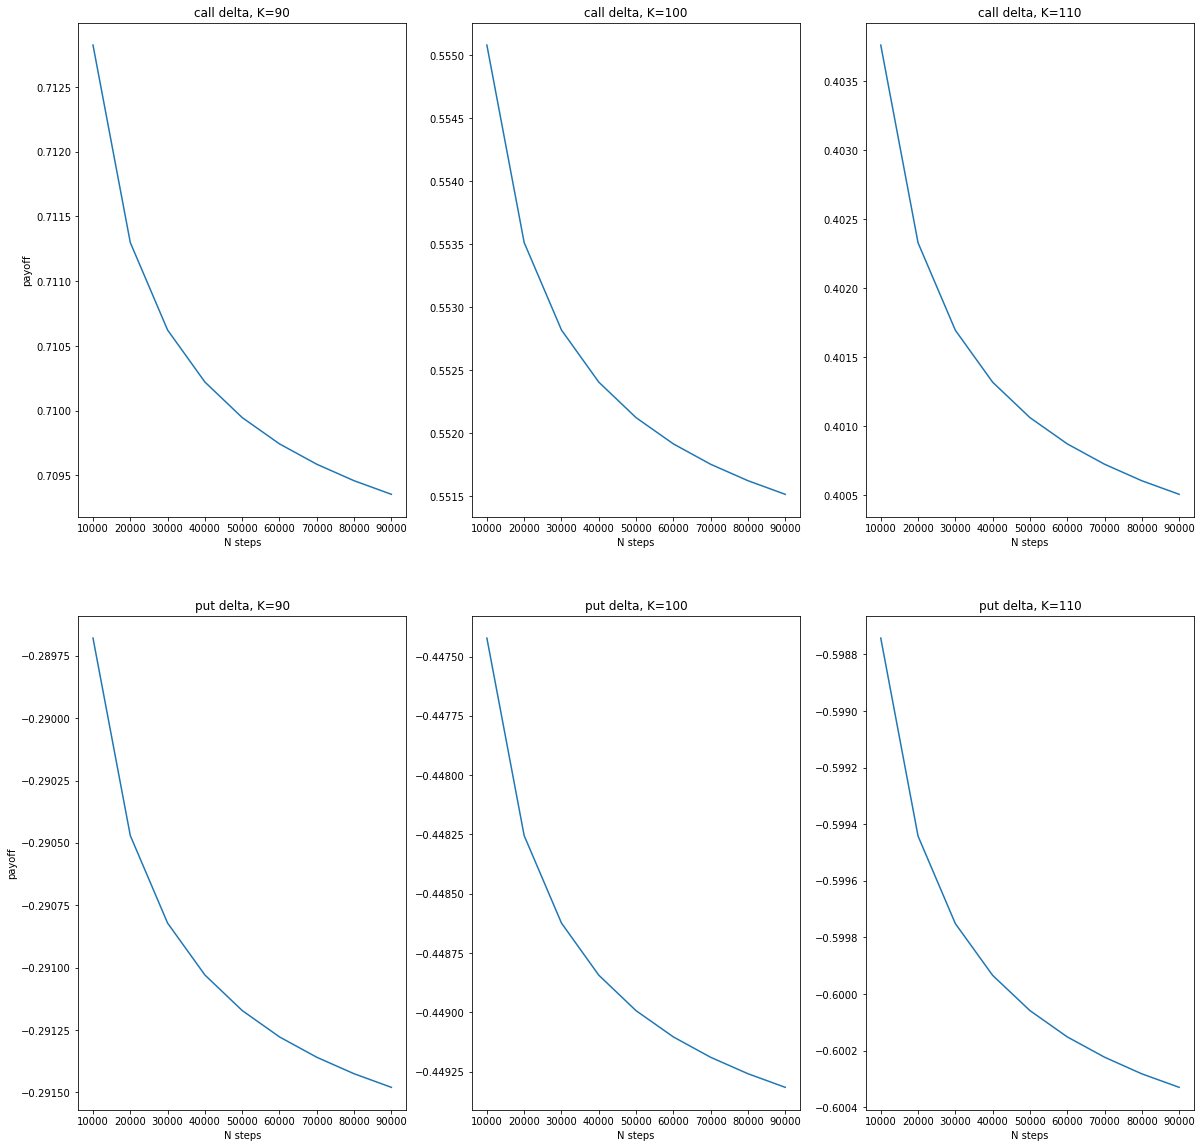

In [11]:
X = n_points
  
Y1 = call_90_delta
Y2 = call_100_delta
Y3 = call_110_delta
Y4 = put_90_delta
Y5 = put_100_delta
Y6 = put_110_delta
  
figure, axis = plt.subplots(2, 3, figsize=(20, 20)) 

axis[0, 0].plot(X, Y1) 
axis[0, 0].set_title("call delta, K=90") 
axis[0, 0].ticklabel_format(useOffset=False)
axis[0, 0].set_xlabel("N steps")
axis[0, 0].set_ylabel("payoff")
  
axis[0, 1].plot(X, Y2) 
axis[0, 1].set_title("call delta, K=100")
axis[0, 1].ticklabel_format(useOffset=False)
axis[0, 1].set_xlabel("N steps")
  
axis[0, 2].plot(X, Y3) 
axis[0, 2].set_title("call delta, K=110")
axis[0, 2].ticklabel_format(useOffset=False)
axis[0, 2].set_xlabel("N steps")

axis[1, 0].plot(X, Y4) 
axis[1, 0].set_title("put delta, K=90") 
axis[1, 0].ticklabel_format(useOffset=False)
axis[1, 0].set_xlabel("N steps")
axis[1, 0].set_ylabel("payoff")
  
axis[1, 1].plot(X, Y5) 
axis[1, 1].set_title("put delta, K=100")
axis[1, 1].ticklabel_format(useOffset=False)
axis[1, 1].set_xlabel("N steps")
  
axis[1, 2].plot(X, Y6) 
axis[1, 2].set_title("put delta, K=110")
axis[1, 2].ticklabel_format(useOffset=False)
axis[1, 2].set_xlabel("N steps")

plt.show()

In [12]:
print("Call option delta, K = 90:", call_90_delta[-1])
print("Call option delta, K = 100:", call_100_delta[-1])
print("Call option delta, K = 110:", call_110_delta[-1])
print("\n")
print("Put option delta, K = 90:", put_90_delta[-1])
print("Put option delta, K = 100:", put_100_delta[-1])
print("Put option delta, K = 110:", put_110_delta[-1])

Call option delta, K = 90: 0.7093537779047123
Call option delta, K = 100: 0.5515169479732999
Call option delta, K = 110: 0.40050440197442827


Put option delta, K = 90: -0.2914799027472482
Put option delta, K = 100: -0.4493167326787512
Put option delta, K = 110: -0.6003292786777241


The delta when N is large is approximately equal to the delta calculated by the Black Scholes model, which is shown later.

### Plot the gamma values for the options at different strikes as N → ∞
The gamma for calls and puts are always positive, so we won't differentiate between the two options.

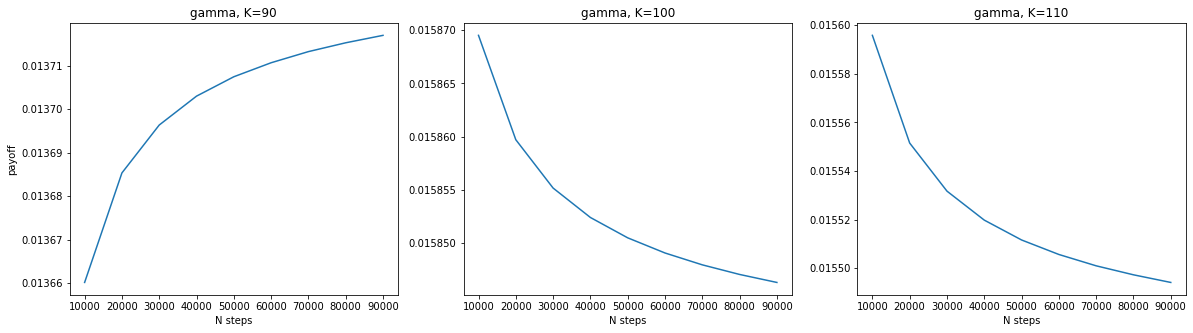

In [13]:
X = n_points
  
Y1 = gamma_90
Y2 = gamma_100
Y3 = gamma_110

figure, axis = plt.subplots(1, 3, figsize=(20, 5)) 

axis[0].plot(X, Y1) 
axis[0].set_title("gamma, K=90") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
  
axis[1].plot(X, Y2) 
axis[1].set_title("gamma, K=100")
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")
  
axis[2].plot(X, Y3) 
axis[2].set_title("gamma, K=110")
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")

plt.show()

In [14]:
print("Gamma, K = 90:", gamma_90[-1])
print("Gamma, K = 100:", gamma_100[-1])
print("Gamma, K = 110:", gamma_110[-1])

Gamma, K = 90: 0.013717022381824746
Gamma, K = 100: 0.015846304074967864
Gamma, K = 110: 0.015494088486006885


The gamma when N is large is approximately equal to the gamma calculated by the Black Scholes model, which is shown later.

### Black Scholes calculation
Now, we define a function to calculate the option payoff with the black scholes method and the corresponding delta and gamma values.

In [15]:
def black_scholes_price(S0, K, sigma, r, T, option_type):
    d1 = (np.log(S0/K) + (r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    if option_type == "call":
        price = S0*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
    if option_type == "put":
        price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S0*norm.cdf(-d1, 0, 1)
    return round(price, 3)

In [16]:
def black_scholes_delta(S0, K, sigma, r, T, option_type):
    d1 = (np.log(S0/K)  + (r + sigma **2/2) * T) * 1/(sigma*np.sqrt(T))
    if option_type == 'call':
        return round(norm.cdf(d1, 0, 1), 3)
    if option_type == 'put':
        return round(-norm.cdf(-d1, 0, 1), 3)
    
def black_scholes_gamma(S0, K, sigma, r, T):
    d1 = (np.log(S0/K)  + (r + sigma **2/2) * T) * 1/(sigma*np.sqrt(T))
    return round(norm.pdf(d1, 0, 1)/(S0*sigma*np.sqrt(T)), 5)

Now that we've defined the functions, we store the payoff, delta, and gamma values in variables. We will use the variables to create a dataframe.

In [17]:
call_price_90 = black_scholes_price(100, 90, 0.25, 0, 1, 'call')
call_price_100 = black_scholes_price(100, 100, 0.25, 0, 1, 'call')
call_price_110 = black_scholes_price(100, 110, 0.25, 0, 1, 'call')
put_price_90 = black_scholes_price(100, 90, 0.25, 0, 1, 'put')
put_price_100 = black_scholes_price(100, 100, 0.25, 0, 1, 'put')
put_price_110 = black_scholes_price(100, 110, 0.25, 0, 1, 'put')

In [18]:
call_delta_90 = black_scholes_delta(100, 90, 0.25, 0, 1, 'call')
call_delta_100 = black_scholes_delta(100, 100, 0.25, 0, 1, 'call')
call_delta_110 = black_scholes_delta(100, 110, 0.25, 0, 1, 'call')
put_delta_90 = black_scholes_delta(100, 90, 0.25, 0, 1, 'put')
put_delta_100 = black_scholes_delta(100, 100, 0.25, 0, 1, 'put')
put_delta_110 = black_scholes_delta(100, 110, 0.25, 0, 1, 'put')

In [19]:
gamma_90 = black_scholes_gamma(100, 90, 0.25, 0, 1)
gamma_100 = black_scholes_gamma(100, 100, 0.25, 0, 1)
gamma_110 = black_scholes_gamma(100, 110, 0.25, 0, 1)

Below, we define a dataframe to list the calculations returned by the black scholes functions.

In [20]:
data = [['call', '90', call_price_90, call_delta_90, gamma_90], 
        ['call', '100', call_price_100, call_delta_100, gamma_100],
        ['call', '110', call_price_110, call_delta_110, gamma_110], 
        ['put', '90', put_price_90, put_delta_90, gamma_90], 
        ['put', '100', put_price_100, put_delta_100, gamma_100],
        ['put', '110', put_price_110, put_delta_110, gamma_110]]
bs_df = pd.DataFrame(data, columns=['option type', 'strike', 'BS price', 'BS delta', 'BS gamma'])
bs_df

,option type,strike,BS price,BS delta,BS gamma
0,call,90,15.272,0.708,0.01374
1,call,100,9.948,0.550,0.01583
2,call,110,6.190,0.399,0.01544
3,put,90,5.272,-0.292,0.01374
4,put,100,9.948,-0.450,0.01583
5,put,110,16.190,-0.601,0.01544


### Comparison of binomial tree and Black Scholes calculations
By observing the payoff, delta, and gamma values as N gets larger, it is clear that the binomial tree values when N is extremely large are almost if not all equal to the corresponding values returned by the Black Scholes formula. In other words, the calculations from the binomial tree converges to that of the Black Scholes model as N approaches infinity.

# Exercise 5
Consider a European call option with maturity T > 0 and strike K > 0 evaluated
at time zero, written on a stock price process (St)t≥0 following the Black-Scholes model. Consider the
following values: S0 = 100, r = 0 and σ = 25%. Plot the convergence of the trinomial tree when K =
90, K = 100 and K = 110 for different values of λ and compare the result with the ones obtained before for
the binomial tree. Which one is optimal? Try to run the model for λ^(−1) = σ√τ /δx > 1 and describe what
you observe.

### Trinomial tree calculation

In [21]:
def trinomial(S0, K, sigma, r, T, n, lmbd, option_type):
    
    dt = T/n # step size
    u = np.exp(lmbd*sigma*np.sqrt(dt)) # upwards factor
    d = 1/u # downwards factor
    m = 1
    
    # define the risk-neutral probabilities
    Qu = 0.5*(1/(lmbd**2) + np.sqrt(dt)*(r-0.5*sigma**2)/(lmbd*sigma)) 
    Qd = 0.5*(1/(lmbd**2) - np.sqrt(dt)*(r-0.5*sigma**2)/(lmbd*sigma)) 
    Qm = 1 - 1/lmbd**2

    St = np.zeros((n+1,n+1,n+1)) # create dummy array for stock price
    St[0,0,0] = S0 # fill the array with the initial price S0

    for i in range(1,n+1):
        St[i,0,0] = St[i-1,0,0]

        for j in range(1,i+1):
            St[i,j,0] = u*St[i-1,j-1,0]

            for k in range(1,j+1):
                St[i,j,k] = d*St[i-1,j-1,k-1]

    V = np.zeros((n+1,n+1,n+1)) # create dummy array for payoff

    for i in range(n+1):
        for j in range(i+1):

            if option_type == "call":
                V[n,i,j] = max(0, St[n,i,j] - K) # replace the zeros with payoff for a call

            if option_type == "put":
                V[n,i,j] = max(0, K - St[n,i,j]) # replace the zeros with payoff for a put

    for i in range(n-1,-1,-1):
        for j in range(i+1):
            for k in range(j+1):
        
                if option_type == "call":
                    V[i,j,k] = np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1]) # overwrite              

                if option_type == "put":
                    V[i,j,k] = np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1]) # overwrite
    
    return V[0,0,0] #return results

Just like before, we create empty lists to store the values returned by running the trinomial function multiple times as N gets larger.

In [22]:
lambda1_call90 = []
lambda2_call90 = []
lambda3_call90 = []

for N in [200, 400, 600]:
    payoff_value1 = trinomial(100, 90, 0.25, 0, 1, N, 1, "call")
    payoff_value2 = trinomial(100, 90, 0.25, 0, 1, N, 1.5, "call")
    payoff_value3 = trinomial(100, 90, 0.25, 0, 1, N, 2, "call")
    lambda1_call90.append(payoff_value1)
    lambda2_call90.append(payoff_value2)
    lambda3_call90.append(payoff_value3)

In [23]:
lambda1_call100 = []
lambda2_call100 = []
lambda3_call100 = []

for N in [200, 400, 600]:
    payoff_value1 = trinomial(100, 100, 0.25, 0, 1, N, 1, "call")
    payoff_value2 = trinomial(100, 100, 0.25, 0, 1, N, 1.5, "call")
    payoff_value3 = trinomial(100, 100, 0.25, 0, 1, N, 2, "call")
    lambda1_call100.append(payoff_value1)
    lambda2_call100.append(payoff_value2)
    lambda3_call100.append(payoff_value3)

In [24]:
lambda1_call110 = []
lambda2_call110 = []
lambda3_call110 = []

for N in [200, 400, 600]:
    payoff_value1 = trinomial(100, 110, 0.25, 0, 1, N, 1, "call")
    payoff_value2 = trinomial(100, 110, 0.25, 0, 1, N, 1.5, "call")
    payoff_value3 = trinomial(100, 110, 0.25, 0, 1, N, 2, "call")
    lambda1_call110.append(payoff_value1)
    lambda2_call110.append(payoff_value2)
    lambda3_call110.append(payoff_value3)

### Plot the payoff values for the call option at different λ as N → ∞

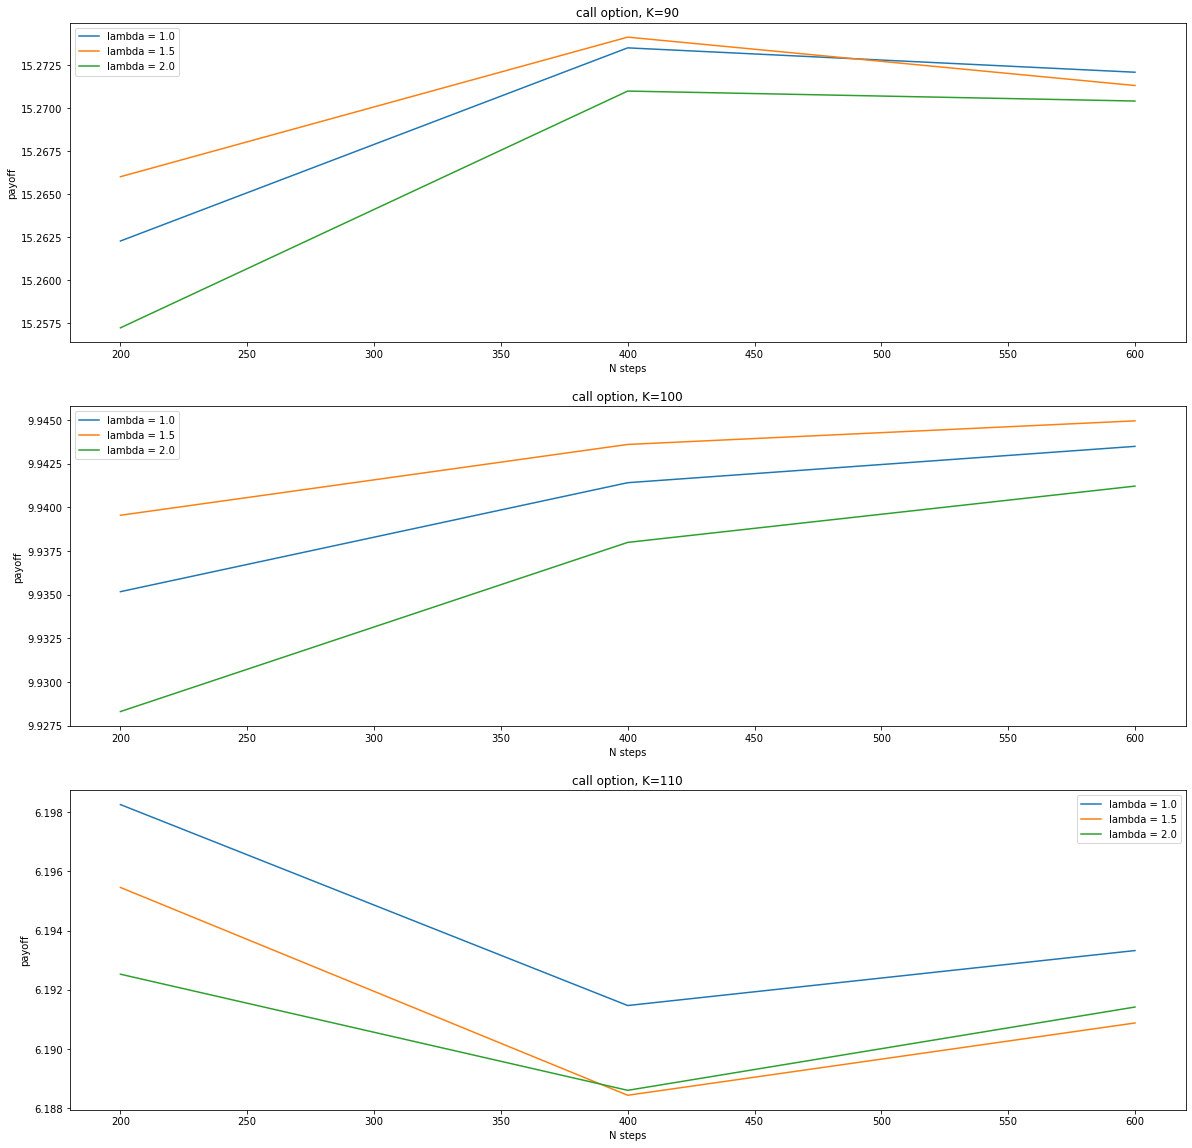

In [25]:
X = [200, 400, 600]

Y1 = lambda1_call90
Y2 = lambda2_call90
Y3 = lambda3_call90
Y4 = lambda1_call100
Y5 = lambda2_call100
Y6 = lambda3_call100
Y7 = lambda1_call110
Y8 = lambda2_call110
Y9 = lambda3_call110

figure, axis = plt.subplots(3, 1, figsize=(20, 20)) 

axis[0].plot(X, Y1, label='lambda = 1.0')
axis[0].plot(X, Y2, label='lambda = 1.5')
axis[0].plot(X, Y3, label='lambda = 2.0')
axis[0].set_title("call option, K=90") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
axis[0].legend()

axis[1].plot(X, Y4, label='lambda = 1.0')
axis[1].plot(X, Y5, label='lambda = 1.5')
axis[1].plot(X, Y6, label='lambda = 2.0')
axis[1].set_title("call option, K=100") 
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")
axis[1].set_ylabel("payoff")
axis[1].legend()

axis[2].plot(X, Y7, label='lambda = 1.0')
axis[2].plot(X, Y8, label='lambda = 1.5')
axis[2].plot(X, Y9, label='lambda = 2.0')
axis[2].set_title("call option, K=110") 
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")
axis[2].set_ylabel("payoff")
axis[2].legend()

In [26]:
lambda1_put90 = []
lambda2_put90 = []
lambda3_put90 = []

for N in [200, 400, 600]:
    payoff_value1 = trinomial(100, 90, 0.25, 0, 1, N, 1, "put")
    payoff_value2 = trinomial(100, 90, 0.25, 0, 1, N, 1.5, "put")
    payoff_value3 = trinomial(100, 90, 0.25, 0, 1, N, 2, "put")
    lambda1_put90.append(payoff_value1)
    lambda2_put90.append(payoff_value2)
    lambda3_put90.append(payoff_value3)
    
    
lambda1_put100 = []
lambda2_put100 = []
lambda3_put100 = []

for N in [200, 400, 600]:
    payoff_value1 = trinomial(100, 100, 0.25, 0, 1, N, 1, "put")
    payoff_value2 = trinomial(100, 100, 0.25, 0, 1, N, 1.5, "put")
    payoff_value3 = trinomial(100, 100, 0.25, 0, 1, N, 2, "put")
    lambda1_put100.append(payoff_value1)
    lambda2_put100.append(payoff_value2)
    lambda3_put100.append(payoff_value3)
    
lambda1_put110 = []
lambda2_put110 = []
lambda3_put110 = []

for N in [200, 400, 600]:
    payoff_value1 = trinomial(100, 110, 0.25, 0, 1, N, 1, "put")
    payoff_value2 = trinomial(100, 110, 0.25, 0, 1, N, 1.5, "put")
    payoff_value3 = trinomial(100, 110, 0.25, 0, 1, N, 2, "put")
    lambda1_put110.append(payoff_value1)
    lambda2_put110.append(payoff_value2)
    lambda3_put110.append(payoff_value3)

### Plot the payoff values for the put option at different λ as N → ∞

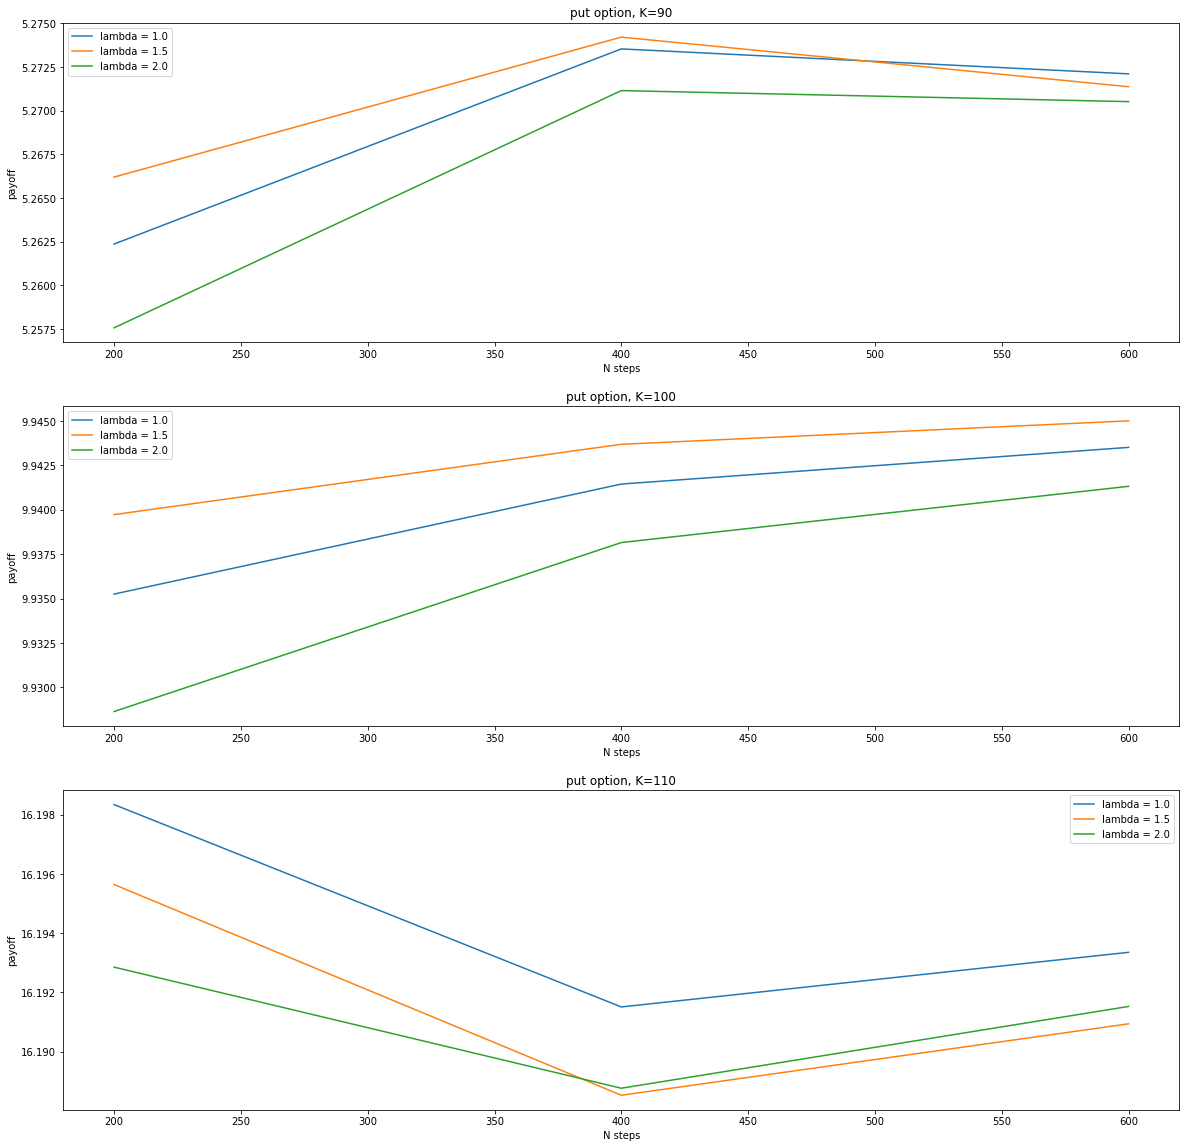

In [27]:
X = [200, 400, 600]

Y1 = lambda1_put90
Y2 = lambda2_put90
Y3 = lambda3_put90
Y4 = lambda1_put100
Y5 = lambda2_put100
Y6 = lambda3_put100
Y7 = lambda1_put110
Y8 = lambda2_put110
Y9 = lambda3_put110

figure, axis = plt.subplots(3, 1, figsize=(20, 20)) 

axis[0].plot(X, Y1, label='lambda = 1.0')
axis[0].plot(X, Y2, label='lambda = 1.5')
axis[0].plot(X, Y3, label='lambda = 2.0')
axis[0].set_title("put option, K=90") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
axis[0].legend()

axis[1].plot(X, Y4, label='lambda = 1.0')
axis[1].plot(X, Y5, label='lambda = 1.5')
axis[1].plot(X, Y6, label='lambda = 2.0')
axis[1].set_title("put option, K=100") 
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")
axis[1].set_ylabel("payoff")
axis[1].legend()

axis[2].plot(X, Y7, label='lambda = 1.0')
axis[2].plot(X, Y8, label='lambda = 1.5')
axis[2].plot(X, Y9, label='lambda = 2.0')
axis[2].set_title("put option, K=110") 
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")
axis[2].set_ylabel("payoff")
axis[2].legend()

### Running the model for λ^(−1) = σ√τ /δx > 1
In the next cell, we try to simulate the trinomial function for λ = 0.5 (i.e.,  λ^(−1) > 1).

In [28]:
trinomial(100, 100, 0.25, 0, 1, 1000, 0.5, "call")
trinomial(100, 100, 0.25, 0, 1, 1000, 0.5, "put")

/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_71206/2632157139.py:41: RuntimeWarning: overflow encountered in double_scalars
  V[i,j,k] = np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1]) # overwrite
/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_71206/2632157139.py:41: RuntimeWarning: invalid value encountered in double_scalars
  V[i,j,k] = np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1]) # overwrite
/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_71206/2632157139.py:44: RuntimeWarning: overflow encountered in double_scalars
  V[i,j,k] = np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1]) # overwrite
/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_71206/2632157139.py:44: RuntimeWarning: invalid value encountered in double_scalars
  V[i,j,k] = np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1]) # overwrite


nan

By setting λ = 0.5, we can see that the code returns a warning. When λ is less than 1, it implies that the probability Qm < 0 and the function ends up working with invalid values. In this case, the constraints are violated and the trinomial function experiences an overflow.

### Concluding comments on λ values

By observing the graph, we can see that when λ = 1, the trinomial tree reduces to the binomial model. Additionally, there's a noticeable deviation in the payoff graph when λ = 2; hence, it would be optimal to choose a value of λ between 1 and 1.5. If λ is too large, modeling the distribution will be very restrictive as the solutions are extremely unstable.

# Exercise 6
Compute the value of an American call and put option with both binomial and
trinomial tree. Consider the following values: S0 = 100, r = 0 and σ = 25%. Plot the convergence of the tree
when K < 90, K = 100 and K = 110. For the trinomial tree compare the convergence for different values of
λ. In particular, compare the convergence of the trinomial tree for λ = 1 and the one of the binomial tree.

### Binomial tree calculation (American options)

In [29]:
def binomial_am(S0, K, sigma, r, T, N, option_type):
    
    V = np.zeros(N + 1) # dummy list to store payoff values 
    dt = T/N # step size
    u = np.exp(sigma * np.sqrt(dt)) # upwards factor
    d = 1/u # downwards factor

    St = np.array([(S0 * u**num * d ** (N - num)) for num in range(N + 1)]) # current price

    comp = np.exp(r*dt) # rate compounded
    p = (comp-d)/(u-d) # upwards probability
    q = 1-p # downwards probability

    if option_type == "call":
        V[:] = np.maximum(St-K, 0) # define payoff for a call
    if option_type == "put":
        V[:] = np.maximum(K-St, 0) # define payoff for a put

    for i in range(N-1, -1, -1):
        V[:-1] = np.exp(-r*dt) * (p*V[1:] + q*V[:-1]) # overwrite payoff at each step and work backwards
        St = St*u # backtrack to previous underlying price
        if option_type == "call":
            V = np.maximum(V, St-K) 
        if option_type == "put":
            V = np.maximum(V, K-St)
        
    # return results
    return V[0]

In [30]:
am_call_80 = []
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value = binomial_am(100, 80, 0.25, 0, 1, N, "call")
    am_call_80.append(payoff_value)
am_call_100 = []
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value = binomial_am(100, 100, 0.25, 0, 1, N, "call")
    am_call_100.append(payoff_value)
am_call_110 = []
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value = binomial_am(100, 110, 0.25, 0, 1, N, "call")
    am_call_110.append(payoff_value)
am_put_80 = []
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value = binomial_am(100, 80, 0.25, 0, 1, N, "put")
    am_put_80.append(payoff_value)
am_put_100 = []
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value = binomial_am(100, 100, 0.25, 0, 1, N, "put")
    am_put_100.append(payoff_value)
am_put_110 = []
for N in np.arange(start=10000, stop=100000, step=10000):
    payoff_value = binomial_am(100, 110, 0.25, 0, 1, N, "put")
    am_put_110.append(payoff_value)

### Plot the payoff values for the call option at different strikes as N → ∞

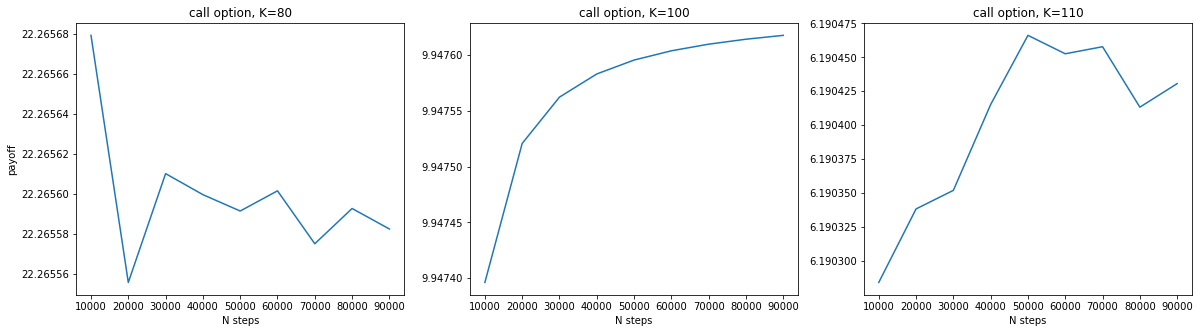

In [31]:
X = n_points
  
Y1 = am_call_80 
Y2 = am_call_100
Y3 = am_call_110
  
figure, axis = plt.subplots(1, 3, figsize=(20,5)) 

axis[0].plot(X, Y1) 
axis[0].set_title("call option, K=80") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
  
axis[1].plot(X, Y2) 
axis[1].set_title("call option, K=100")
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")

axis[2].plot(X, Y3) 
axis[2].set_title("call option, K=110")
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")

plt.show() 

In [32]:
print('American call value, K=80:', am_call_80[-1])
print('American call value, K=100:', am_call_100[-1])
print('American call value, K=110:', am_call_110[-1])

American call value, K=80: 22.265582498589726
American call value, K=100: 9.947617334164036
American call value, K=110: 6.190430635557205


### Plot the payoff values for the put option at different strikes as N → ∞

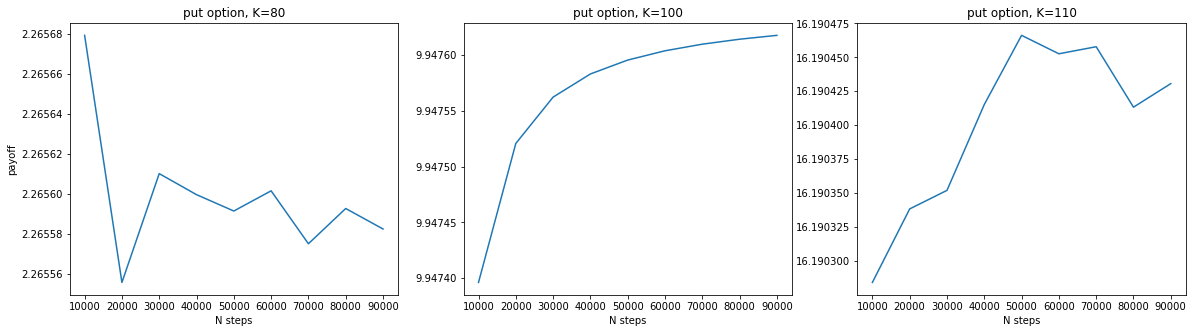

In [33]:
X = n_points
  
Y1 = am_put_80 
Y2 = am_put_100
Y3 = am_put_110
  
figure, axis = plt.subplots(1, 3, figsize=(20,5)) 

axis[0].plot(X, Y1)
axis[0].set_title("put option, K=80") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
  
axis[1].plot(X, Y2) 
axis[1].set_title("put option, K=100")
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")

axis[2].plot(X, Y3) 
axis[2].set_title("put option, K=110")
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")

plt.show() 

In [34]:
print('American put value, K=80:', am_put_80[-1])
print('American put value, K=100:', am_put_100[-1])
print('American put value, K=110:', am_put_110[-1])

American put value, K=80: 2.2655824985919963
American put value, K=100: 9.94761733416745
American put value, K=110: 16.19043063556333


### Trinomial tree calculation (American options)

In [35]:
def trinomial_am(S0, K, sigma, r, T, n, lmbd, option_type):
    
    dt = T/n # step size
    u = np.exp(lmbd*sigma*np.sqrt(dt)) # upwards factor
    d = 1/u # downwards factor
    m = 1
    
    # define the risk-neutral probabilities
    Qu = 0.5*(1/(lmbd**2) + np.sqrt(dt)*(r-0.5*sigma**2)/(lmbd*sigma)) 
    Qd = 0.5*(1/(lmbd**2) - np.sqrt(dt)*(r-0.5*sigma**2)/(lmbd*sigma)) 
    Qm = 1 - 1/lmbd**2

    St = np.zeros((n+1,n+1,n+1)) # create dummy array for stock price
    St[0,0,0] = S0 # fill the array with the initial price S0

    for i in range(1,n+1):
        St[i,0,0] = St[i-1,0,0]

        for j in range(1,i+1):
            St[i,j,0] = u*St[i-1,j-1,0]

            for k in range(1,j+1):
                St[i,j,k] = d*St[i-1,j-1,k-1]

    V = np.zeros((n+1,n+1,n+1)) # create dummy array for payoff

    for i in range(n+1):
        for j in range(i+1):

            if option_type == "call":
                V[n,i,j] = max(0, St[n,i,j] - K) # replace the zeros with payoff for a call

            if option_type == "put":
                V[n,i,j] = max(0, K - St[n,i,j]) # replace the zeros with payoff for a put

    for i in range(n-1,-1,-1):
        for j in range(i+1):
            for k in range(j+1):
        
                if option_type == "call": # change the function to check if early exercise is optimal for call/put
                    V[i,j,k] = max(0, St[i,j,k]-K,
                                          np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1])) # overwrite              

                if option_type == "put":
                    V[i,j,k] = max(0, K-St[i,j,k], 
                                          np.exp(-r*dt)*(Qu*V[i+1,j+1,k]+Qm*V[i+1,j,k]+Qd*V[i+1,j+1,k+1])) # overwrite
    
    return V[0,0,0] #return results

In [36]:
lambda1_call80_am = []
lambda2_call80_am = []
lambda3_call80_am = []

for N in [10, 50, 100]:
    payoff_value1 = trinomial(100, 90, 0.25, 0, 1, N, 1, "call")
    payoff_value2 = trinomial(100, 90, 0.25, 0, 1, N, 1.5, "call")
    payoff_value3 = trinomial(100, 90, 0.25, 0, 1, N, 2, "call")
    lambda1_call80_am.append(payoff_value1)
    lambda2_call80_am.append(payoff_value2)
    lambda3_call80_am.append(payoff_value3)

In [37]:
lambda1_call100_am = []
lambda2_call100_am = []
lambda3_call100_am = []

for N in [10, 50, 100]:
    payoff_value1 = trinomial(100, 100, 0.25, 0, 1, N, 1, "call")
    payoff_value2 = trinomial(100, 100, 0.25, 0, 1, N, 1.5, "call")
    payoff_value3 = trinomial(100, 100, 0.25, 0, 1, N, 2, "call")
    lambda1_call100_am.append(payoff_value1)
    lambda2_call100_am.append(payoff_value2)
    lambda3_call100_am.append(payoff_value3)

In [38]:
lambda1_call110_am = []
lambda2_call110_am = []
lambda3_call110_am = []

for N in [10, 50, 100]:
    payoff_value1 = trinomial(100, 110, 0.25, 0, 1, N, 1, "call")
    payoff_value2 = trinomial(100, 110, 0.25, 0, 1, N, 1.5, "call")
    payoff_value3 = trinomial(100, 110, 0.25, 0, 1, N, 2, "call")
    lambda1_call110_am.append(payoff_value1)
    lambda2_call110_am.append(payoff_value2)
    lambda3_call110_am.append(payoff_value3)

### Plot the payoff values for the American call options at different λ as N → ∞

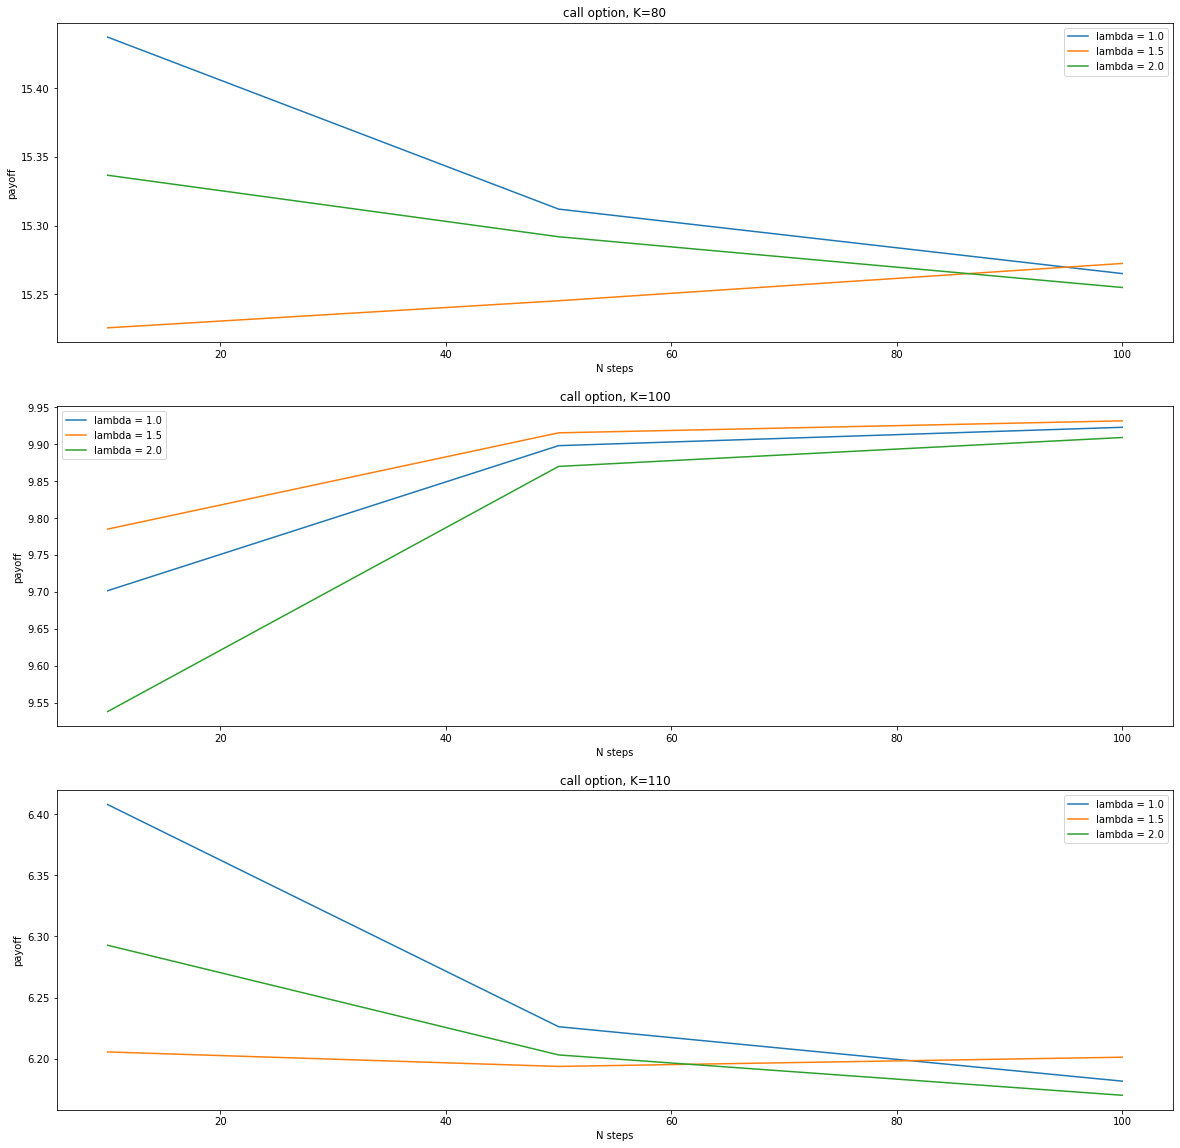

In [39]:
X = [10, 50, 100]

Y1 = lambda1_call80_am
Y2 = lambda2_call80_am
Y3 = lambda3_call80_am
Y4 = lambda1_call100_am
Y5 = lambda2_call100_am
Y6 = lambda3_call100_am
Y7 = lambda1_call110_am
Y8 = lambda2_call110_am
Y9 = lambda3_call110_am

figure, axis = plt.subplots(3, 1, figsize=(20, 20)) 

axis[0].plot(X, Y1, label='lambda = 1.0')
axis[0].plot(X, Y2, label='lambda = 1.5')
axis[0].plot(X, Y3, label='lambda = 2.0')
axis[0].set_title("call option, K=80") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
axis[0].legend()

axis[1].plot(X, Y4, label='lambda = 1.0')
axis[1].plot(X, Y5, label='lambda = 1.5')
axis[1].plot(X, Y6, label='lambda = 2.0')
axis[1].set_title("call option, K=100") 
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")
axis[1].set_ylabel("payoff")
axis[1].legend()

axis[2].plot(X, Y7, label='lambda = 1.0')
axis[2].plot(X, Y8, label='lambda = 1.5')
axis[2].plot(X, Y9, label='lambda = 2.0')
axis[2].set_title("call option, K=110") 
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")
axis[2].set_ylabel("payoff")
axis[2].legend()

In [40]:
lambda1_put80_am = []
lambda2_put80_am = []
lambda3_put80_am = []

for N in [10, 50, 100]:
    payoff_value1 = trinomial(100, 90, 0.25, 0, 1, N, 1, "put")
    payoff_value2 = trinomial(100, 90, 0.25, 0, 1, N, 1.5, "put")
    payoff_value3 = trinomial(100, 90, 0.25, 0, 1, N, 2, "put")
    lambda1_put80_am.append(payoff_value1)
    lambda2_put80_am.append(payoff_value2)
    lambda3_put80_am.append(payoff_value3)
    
    
lambda1_put100_am = []
lambda2_put100_am = []
lambda3_put100_am = []

for N in [10, 50, 100]:
    payoff_value1 = trinomial(100, 100, 0.25, 0, 1, N, 1, "put")
    payoff_value2 = trinomial(100, 100, 0.25, 0, 1, N, 1.5, "put")
    payoff_value3 = trinomial(100, 100, 0.25, 0, 1, N, 2, "put")
    lambda1_put100_am.append(payoff_value1)
    lambda2_put100_am.append(payoff_value2)
    lambda3_put100_am.append(payoff_value3)
    
lambda1_put110_am = []
lambda2_put110_am = []
lambda3_put110_am = []

for N in [10, 50, 100]:
    payoff_value1 = trinomial(100, 110, 0.25, 0, 1, N, 1, "put")
    payoff_value2 = trinomial(100, 110, 0.25, 0, 1, N, 1.5, "put")
    payoff_value3 = trinomial(100, 110, 0.25, 0, 1, N, 2, "put")
    lambda1_put110_am.append(payoff_value1)
    lambda2_put110_am.append(payoff_value2)
    lambda3_put110_am.append(payoff_value3)

### Plot the payoff values for the American put options at different λ as N → ∞

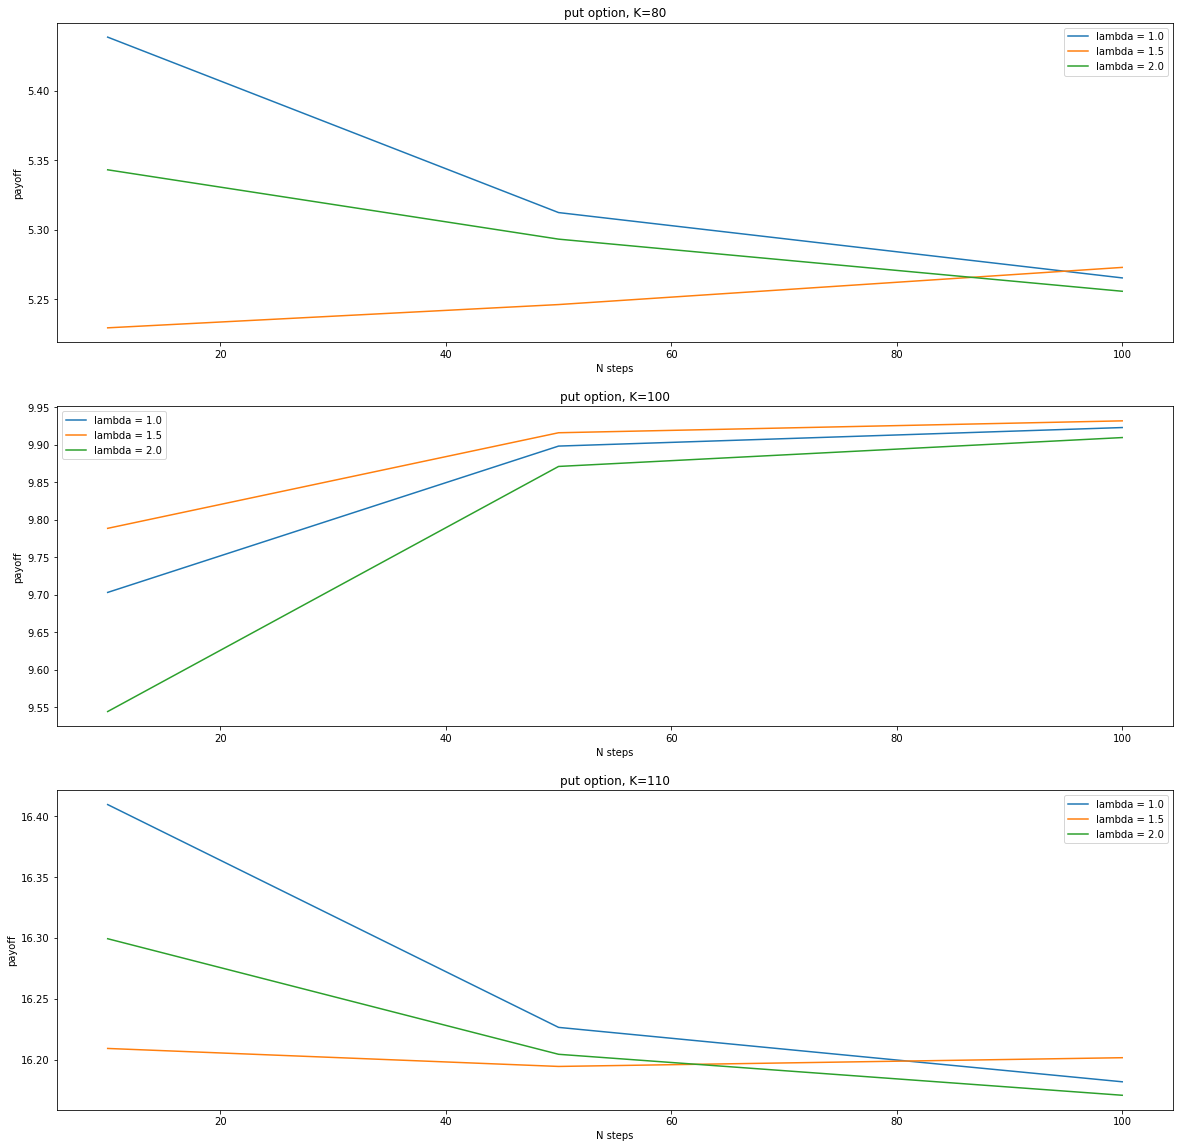

In [42]:
X = [10, 50, 100]

Y1 = lambda1_put80_am
Y2 = lambda2_put80_am
Y3 = lambda3_put80_am
Y4 = lambda1_put100_am
Y5 = lambda2_put100_am
Y6 = lambda3_put100_am
Y7 = lambda1_put110_am
Y8 = lambda2_put110_am
Y9 = lambda3_put110_am

figure, axis = plt.subplots(3, 1, figsize=(20, 20)) 

axis[0].plot(X, Y1, label='lambda = 1.0')
axis[0].plot(X, Y2, label='lambda = 1.5')
axis[0].plot(X, Y3, label='lambda = 2.0')
axis[0].set_title("put option, K=80") 
axis[0].ticklabel_format(useOffset=False)
axis[0].set_xlabel("N steps")
axis[0].set_ylabel("payoff")
axis[0].legend()

axis[1].plot(X, Y4, label='lambda = 1.0')
axis[1].plot(X, Y5, label='lambda = 1.5')
axis[1].plot(X, Y6, label='lambda = 2.0')
axis[1].set_title("put option, K=100") 
axis[1].ticklabel_format(useOffset=False)
axis[1].set_xlabel("N steps")
axis[1].set_ylabel("payoff")
axis[1].legend()

axis[2].plot(X, Y7, label='lambda = 1.0')
axis[2].plot(X, Y8, label='lambda = 1.5')
axis[2].plot(X, Y9, label='lambda = 2.0')
axis[2].set_title("put option, K=110") 
axis[2].ticklabel_format(useOffset=False)
axis[2].set_xlabel("N steps")
axis[2].set_ylabel("payoff")
axis[2].legend()

### Comparison with Binomial model when λ = 1
When λ = 1, the convergence of the trinomial model follows the convergence of the binomial model, holding all other variables constant.